In [5]:
import os
import ee
import geemap
import json
from geemap import geojson_to_ee, ee_to_geojson
from ipyleaflet import GeoJSON
import requests
from osgeo import gdal
import pycrs

from pcraster import *
import rasterio
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import plotly.express as px




In [2]:
# if required run this command
# ee.Initialize()
# print(os.getcwd())

In [ ]:
# Creating a Basemap

In [3]:
Map=geemap.Map(center=[30,78],zoom=5)


In [ ]:
# Adding vector layer of area of interest

In [6]:
in7=gpd.read_file('https://raw.githubusercontent.com/UdayKumar0711/wells/main/parewar.geojson')
# print(type(in7))

In [7]:
fc = geemap.geopandas_to_ee(in7)
# print(type(fc))

In [8]:
roi=fc.geometry()
# print(type(roi))

In [ ]:
# Adding LULC map on Basemap

In [9]:
Esri_lulc=ee.ImageCollection("projects/sat-io/open-datasets/landcover/ESRI_Global-LULC_10m")

In [10]:
vis_params1={'min':1,'max':10,'palette':["#1A5BAB",
    "#358221",
    "#A7D282",
    "#87D19E",
    "#FFDB5C",
    "#EECFA8",
    "#ED022A",
    "#EDE9E4",
    "#F2FAFF",
    "#C8C8C8"]}

legend_dict = {
    '1 Open Water': '1A5BAB',
    '2 Trees': '358221',
    '3 Grass': 'A7D282',
    '4 Flooded Vegetation': '87D19E',
    '5 Crops': 'FFDB5C',
    '6 Shrub': 'EECFA8',
    '7 BuiltupArea': 'ED022A',
    '8 BareGround': 'EDE9E4',
    '9 Snow/Ice': 'F2FAFF',
    '10 Cloud': 'C8C8C8',
}


In [11]:
Map.addLayer(Esri_lulc,vis_params1,name='Esri_lulc')

In [12]:
vis_params = {
'min': 0,
'max': 1,
'palette': [ 'FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718', '74A901','66A000', '529400', '3E8601', '207401', '056201', '004C00', '023B01',
          '012E01', '011D01', '011301']}
colors = vis_params['palette']
vmin = vis_params['min']
vmax = vis_params['max']

In [ ]:
Adding NDVI Map on Basemap

In [13]:
ndvi_7 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200711")
ndvi_8 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200812")
ndvi_9 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200913")
ndvi_10 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201015")
ndvi_11 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201116")
ndvi_12 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201218")


Map.addLayer(ndvi_7,vis_params,name='ndvi_july')
Map.addLayer(ndvi_8 ,vis_params,name='ndvi_aug ')
Map.addLayer(ndvi_9,vis_params,name='ndvi_sept')
Map.addLayer(ndvi_10,vis_params,name='ndvi_oct')
Map.addLayer(ndvi_11,vis_params,name='ndvi_nov')
Map.addLayer(ndvi_12,vis_params,name='ndvi_dec')


In [14]:
ndvi7 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200711").clip(roi)
ndvi8 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200812").clip(roi)
ndvi9 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20200913").clip(roi)
ndvi10 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201015").clip(roi)
ndvi11 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201116").clip(roi)
ndvi12 = ee.Image("LANDSAT/LC08/C01/T1_32DAY_NDVI/20201218").clip(roi)

Map.addLayer(ndvi7,vis_params,name='ndvi_july_clipped')
Map.addLayer(ndvi8 ,vis_params,name='ndvi_aug_clipped ')
Map.addLayer(ndvi9,vis_params,name='ndvi_sept_clipped')
Map.addLayer(ndvi10,vis_params,name='ndvi_oct_clipped')
Map.addLayer(ndvi11,vis_params,name='ndvi_nov_clipped')
Map.addLayer(ndvi12,vis_params,name='ndvi_dec_clipped')


In [15]:
# print('visualization of NDVI & LULC')

visualization of NDVI & LULC


In [16]:
Map.add_colorbar_branca(colors=colors, vmin=vmin, vmax=vmax, categorical=True, step=8,layer_name="ndvi",position='bottomleft')
Map.add_legend(legend_title="LULC2020", legend_dict=legend_dict,position='bottomright')
Map

Map(center=[30, 78], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Tog…

In [ ]:
# Creating a time lapse visualization of NDVI

In [18]:
Map1=geemap.Map(center=[30,78],zoom=5)

In [19]:
ndvi_series = ee.ImageCollection([ndvi_7,ndvi_8,ndvi_9,ndvi_10,ndvi_11,ndvi_12])

In [20]:
layer_names = ['2019_NDVI_month ' + str(months) for months in range(7, 13,1)]

In [21]:
Map1.ts_inspector(left_ts=ndvi_series, right_ts=ndvi_series, left_names=layer_names, right_names=layer_names, left_vis=vis_params, right_vis=vis_params)

In [22]:
# print('visualization of temporal changes in NDVI')

visualization of temporal changes in NDVI


In [23]:
Map1

Map(center=[30, 78], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Dropdown(layout=La…

In [24]:
# saving the NDVI Raster layer

Histogram of NDVI


In [ ]:
geemap.ee_export_image(image10, filename='C:/Users/udayk/Downloads/ndvi_320.tif', scale=90, region=roi,file_per_band=False)

In [ ]:
geemap.ee_export_image(image7, filename='C:/Users/udayk/Downloads/ndvi_224.tif', scale=90, region=roi,file_per_band=False)

In [ ]:
geemap.ee_export_image(image8, filename='C:/Users/udayk/Downloads/ndvi_256.tif', scale=90, region=roi,file_per_band=False)

In [ ]:
geemap.ee_export_image(image9, filename='C:/Users/udayk/Downloads/ndvi_288.tif', scale=90, region=roi,file_per_band=False)

In [ ]:
geemap.ee_export_image(image11, filename='C:/Users/udayk/Downloads/ndvi_352.tif', scale=90, region=roi,file_per_band=False)

In [ ]:
geemap.ee_export_image(image12, filename='C:/Users/udayk/Downloads/ndvi_384.tif', scale=90, region=roi,file_per_band=False)

In [26]:
# projecting raster layer from GCS TO PCS

In [ ]:
def WGSTOUTM(src_filename,dst_filename):
    src_DS=gdal.Open(src_filename)
    dst_DS=gdal.Warp(dst_filename,src_DS,dstSRS='EPSG:32642')
    dst_DS=None
    src_DS=None 
    
WGSTOUTM('ndvi_224.tif','ndvi_224_reproject.tif')
WGSTOUTM('ndvi_256.tif','ndvi_256_reproject.tif')
WGSTOUTM('ndvi_288.tif','ndvi_288_reproject.tif')
WGSTOUTM('ndvi_320.tif','ndvi_320_reproject.tif')
WGSTOUTM('ndvi_352.tif','ndvi_352_reproject.tif')
WGSTOUTM('ndvi_384.tif','ndvi_384_reproject.tif')

In [ ]:
#Converting raaster tiff format to PCRASTER format for spatial analysis

In [ ]:
from osgeo import gdal
from pcraster import *
from osgeo import gdal, gdalconst

def ConvertToPCRaster(src_filename,dst_filename,ot,VS):
    #Open existing dataset
    src_ds = gdal.Open(src_filename)
    
    #GDAL Translate
    dst_ds = gdal.Translate(dst_filename, src_ds, format='PCRaster', outputType=ot, metadataOptions=VS)
    
    #Properly close the datasets to flush to disk
    dst_ds = None
    src_ds = None
    
ConvertToPCRaster("ndvi_224_reproject.tif","ndvi_224_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")
ConvertToPCRaster("ndvi_256_reproject.tif","ndvi_256_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")
ConvertToPCRaster("ndvi_288_reproject.tif","ndvi_288_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")
ConvertToPCRaster("ndvi_320_reproject.tif","ndvi_320_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")
ConvertToPCRaster("ndvi_352_reproject.tif","ndvi_352_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")
ConvertToPCRaster("ndvi_384_reproject.tif","ndvi_384_reproject.map",gdalconst.GDT_Float32,"VS_SCALAR")

In [28]:
# Checking metadata of raster layers

In [ ]:

def RasterLayerProperties(RasterLayer):
    print("Raster file: {}".format(RasterLayer.GetDescription()))
    print("Driver: {}/{}".format(RasterLayer.GetDriver().ShortName,
                            RasterLayer.GetDriver().LongName))
    print("Size is {} x {} x {}".format(RasterLayer.RasterXSize,
                                    RasterLayer.RasterYSize,
                                    RasterLayer.RasterCount))
    RasterLayerProjection = RasterLayer.GetProjection()
    crs = pycrs.parse.from_ogc_wkt(RasterLayerProjection)
    print("Projection:",crs.name)
#   print("Map units:",crs.unit.unitname.ogc_wkt)
    geotransform = RasterLayer.GetGeoTransform()
    if geotransform:
        print("Origin = ({}, {})".format(geotransform[0], geotransform[3]))
        print("Pixel Size = ({} metre , {} metre)".format(geotransform[1], geotransform[5]))
    RasterLayerBand = RasterLayer.GetRasterBand(1)
    print("Minimum: {}".format(RasterLayerBand.GetMinimum()))
    print("Maximum: {}".format(RasterLayerBand.GetMaximum()))
    
    print()
    RasterLayer = None
    
    
Layer7 = gdal.Open( "ndvi_224_reproject.map" )
RasterLayerProperties(Layer7)

Layer8 = gdal.Open( "ndvi_256_reproject.map" )
RasterLayerProperties(Layer8)

Layer9 = gdal.Open( "ndvi_288_reproject.map" )
RasterLayerProperties(Layer9)

Layer10 = gdal.Open( "ndvi_320_reproject.map" )
RasterLayerProperties(Layer10)

Layer11 = gdal.Open( "ndvi_352_reproject.map" )
RasterLayerProperties(Layer11)

Layer12 = gdal.Open( "ndvi_384_reproject.map" )
RasterLayerProperties(Layer12)

In [ ]:
# Calulating histogram of NDVI

In [ ]:
print('Histogram of NDVI')

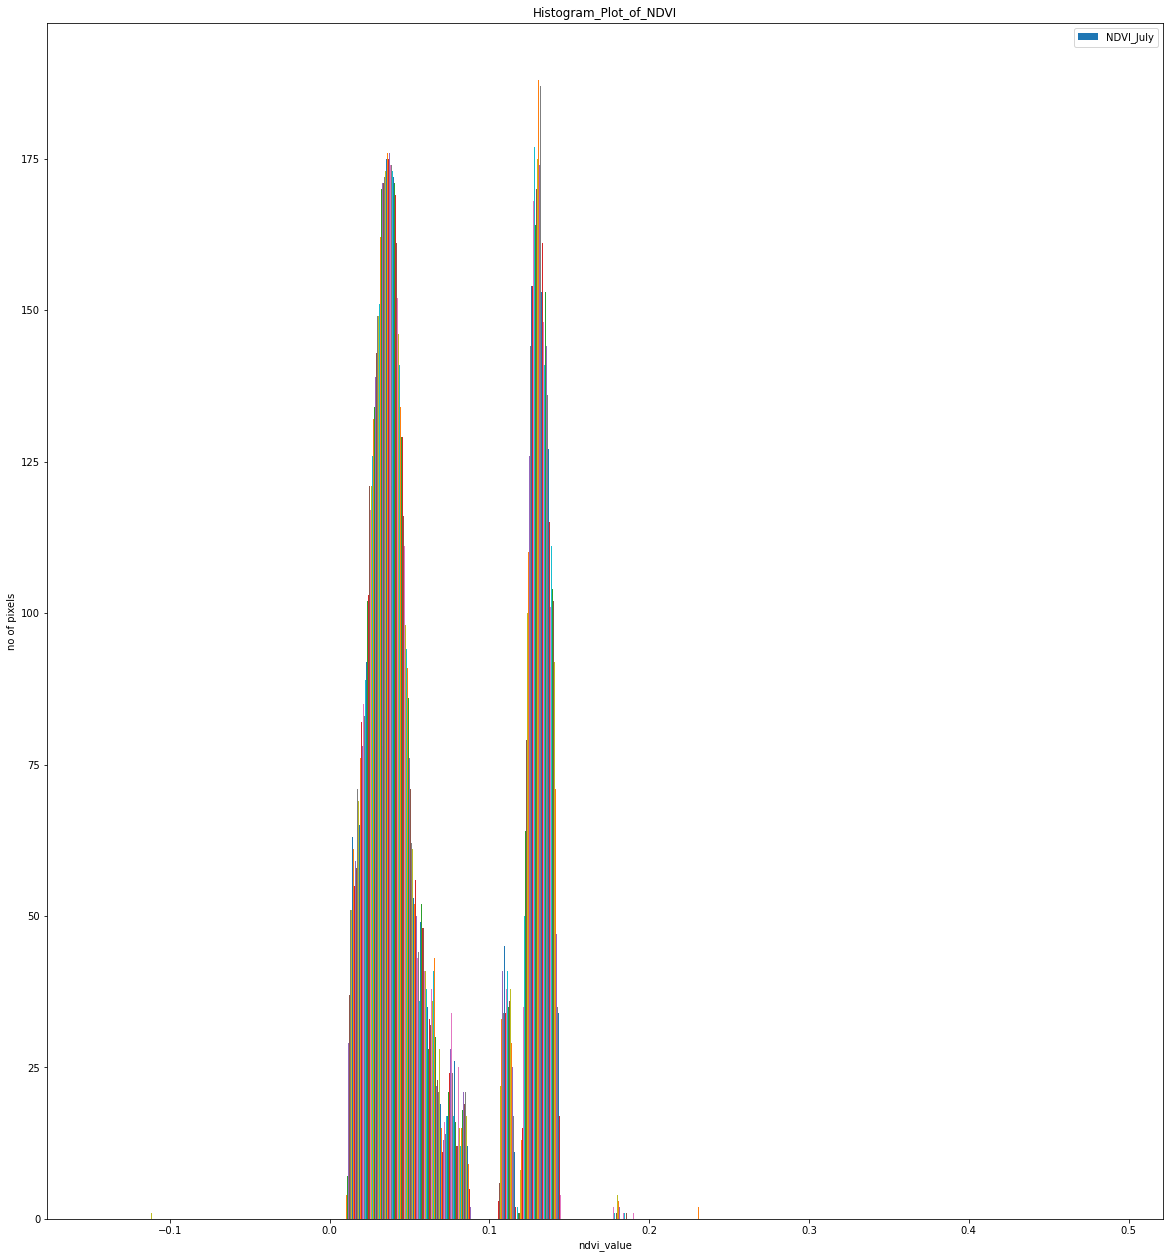

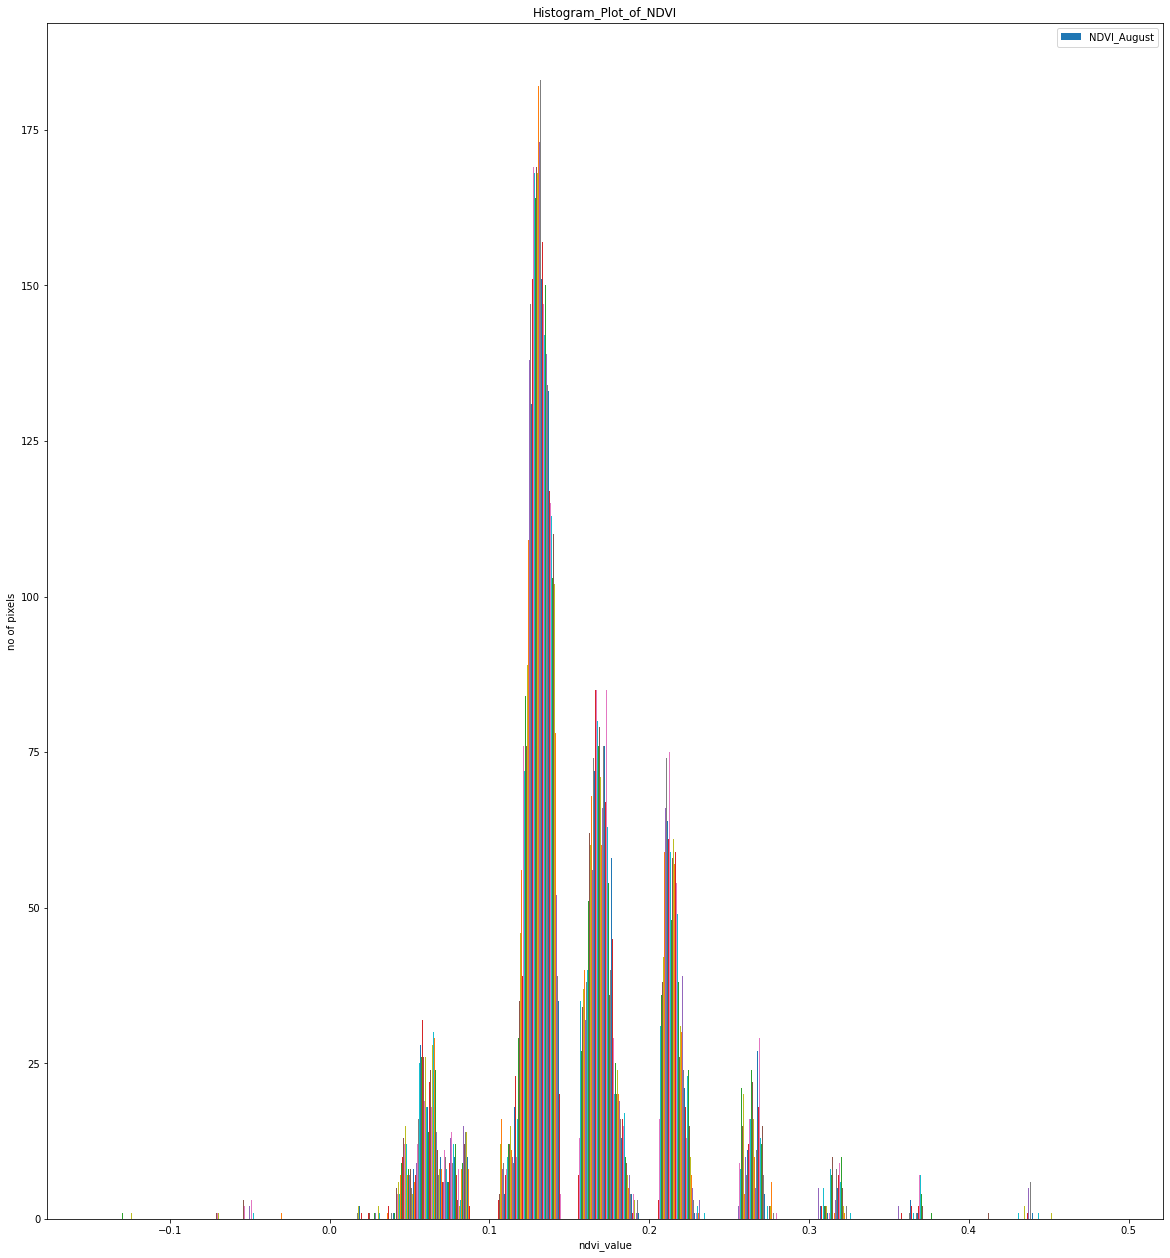

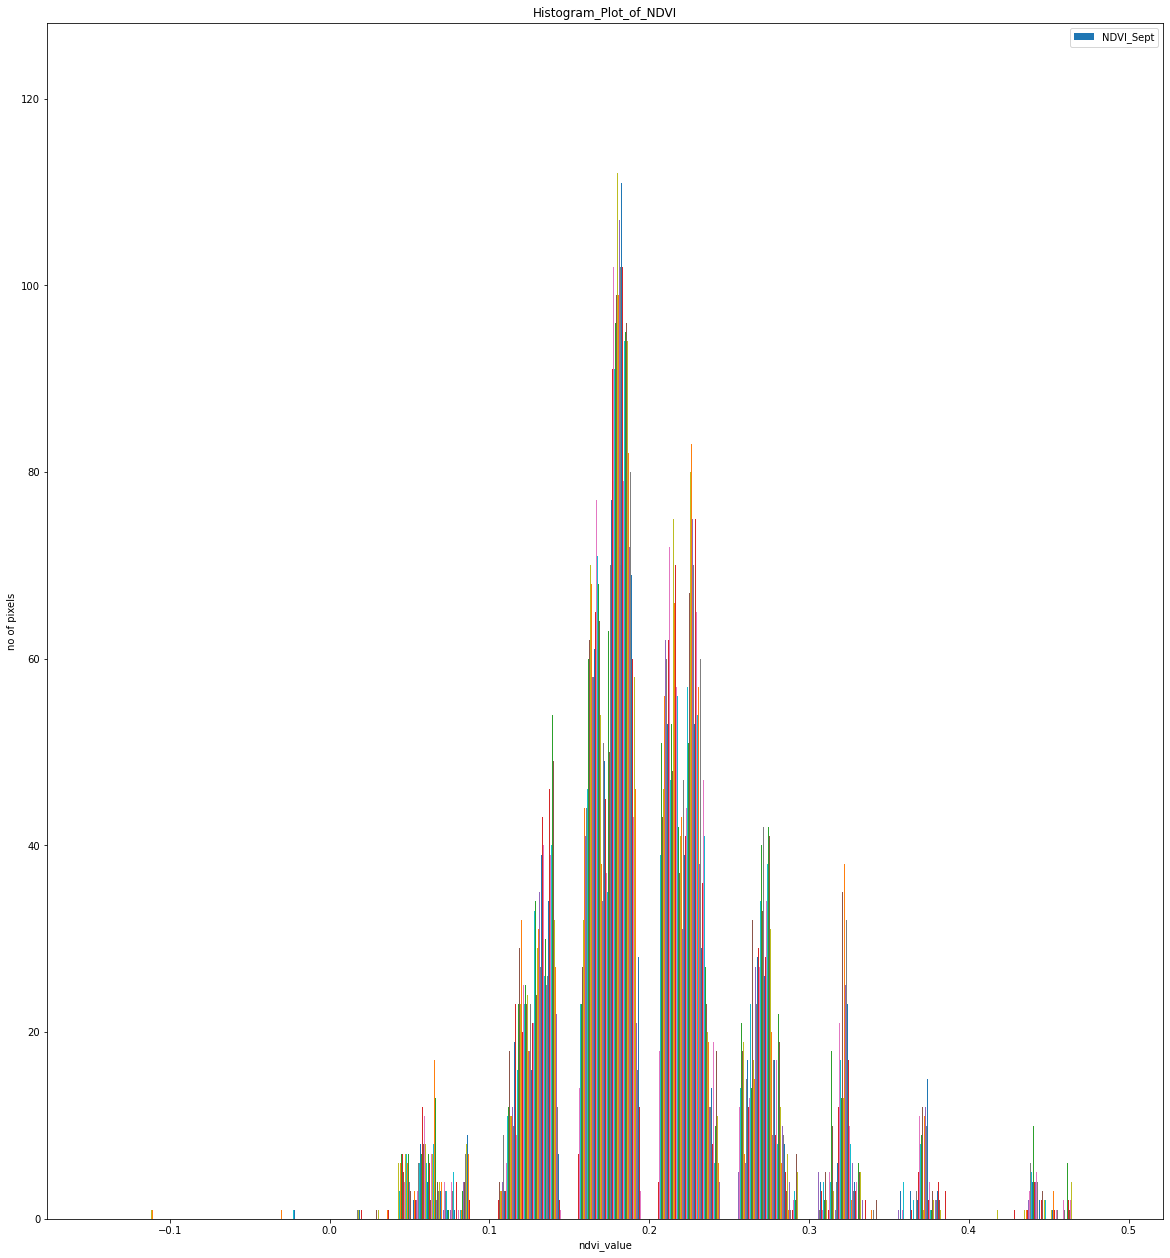

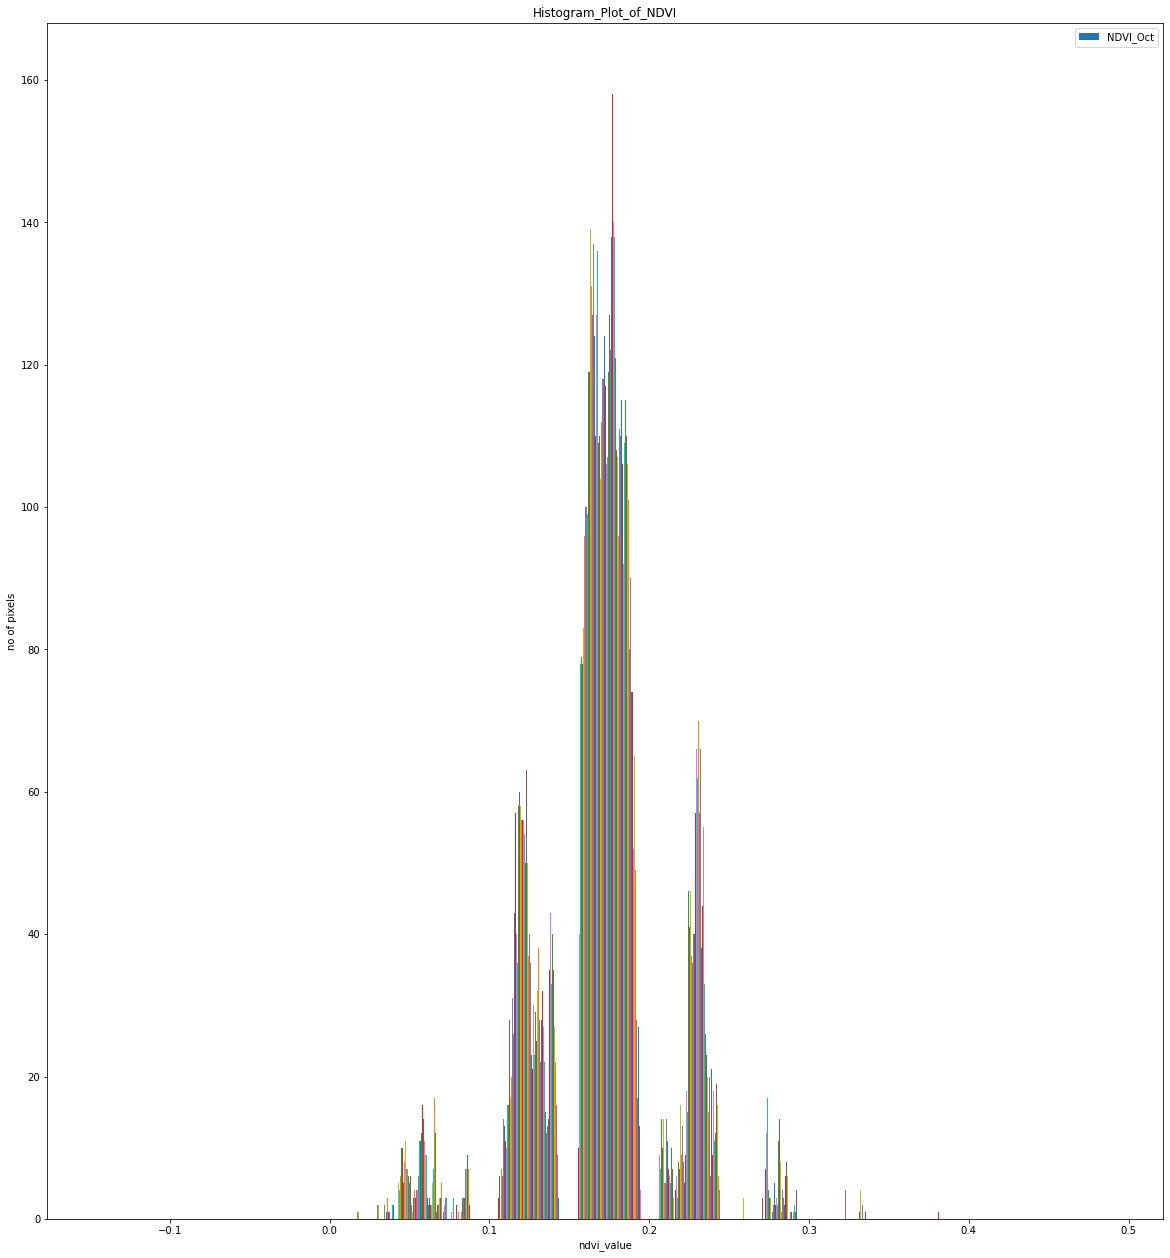

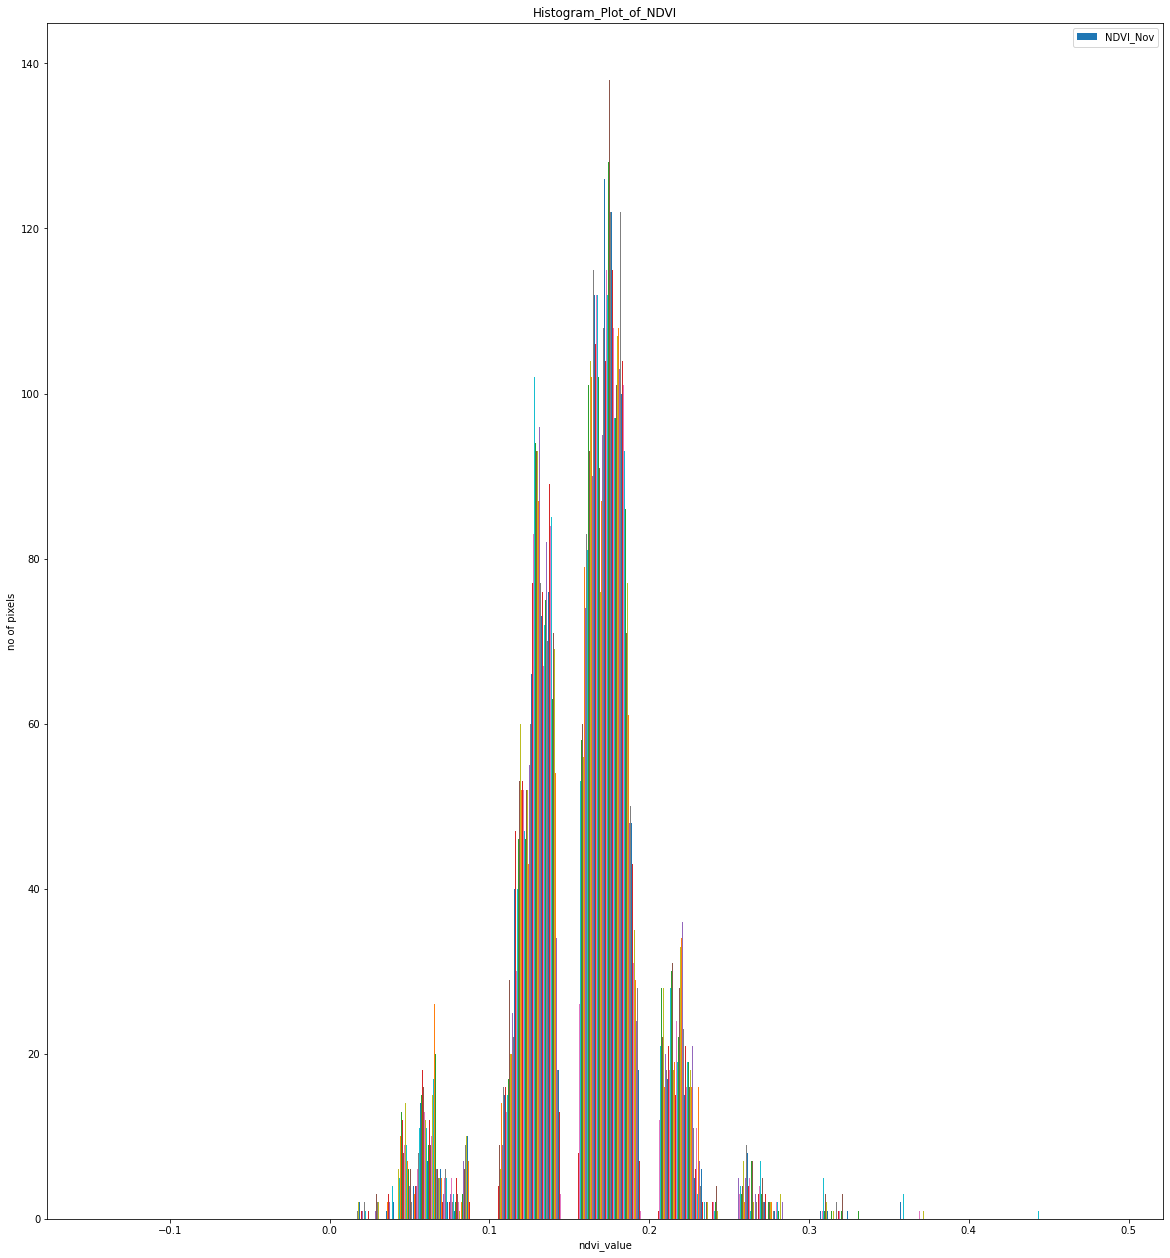

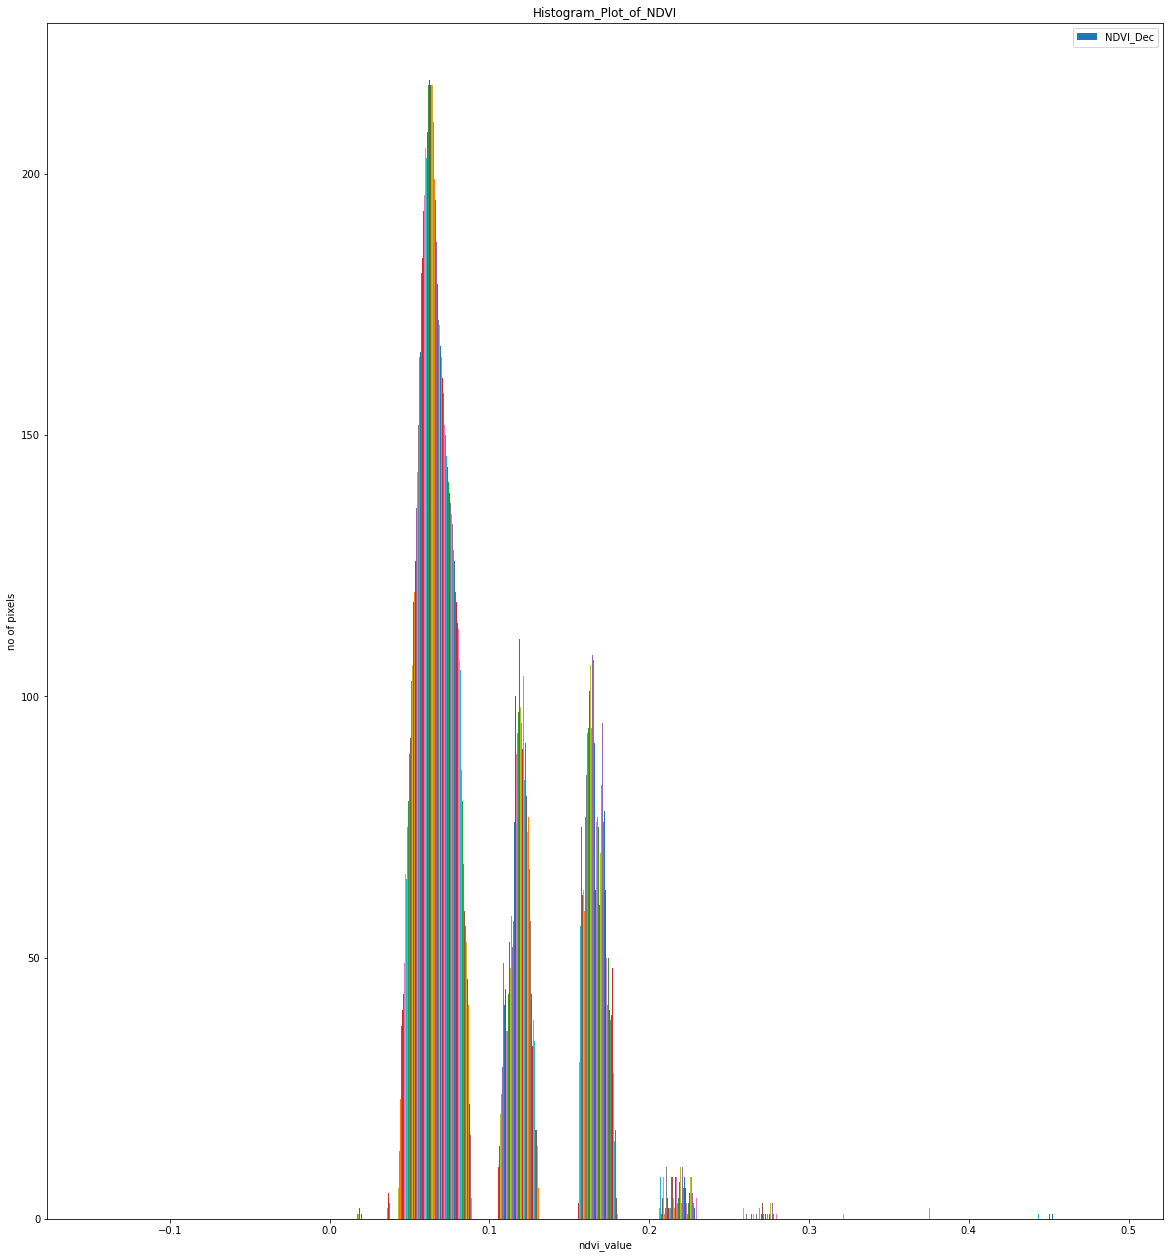

In [25]:
%matplotlib inline
def ndviplot(dataset,name):
 
 dataset1=dataset.read(1)
#  print(dataset1)
#  print(type(dataset1))
#  print(dataset.width)
#  print(dataset.height)
#  n_bins = 5
 legend=['NDVI_'+name]
 fig, ax = plt.subplots(figsize =(20,22))
 plt.hist(dataset1,bins=[-0.15,-0.1,0.0,0.1,0.15,0.20,0.25,0.3,0.35,0.4,0.5])
 plt.xlabel("ndvi_value")
 plt.ylabel("no of pixels")
 plt.legend(legend)
 plt.title('Histogram_Plot_of_NDVI')
 plt.tight_layout
 plt.show() 

in7=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_224_reproject.tif?raw=true')

in8=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_256_reproject.tif?raw=true')
in9=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_288_reproject.tif?raw=true')
in10=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_320_reproject.tif?raw=true')
in11=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_352_reproject.tif?raw=true')
in12=rasterio.open('https://github.com/UdayKumar0711/cropinsure/blob/main/ndvi_384_reproject.tif?raw=true')
ndviplot(in7,'July')
ndviplot(in8,'August')
ndviplot(in9,'Sept')
ndviplot(in10,'Oct')
ndviplot(in11,'Nov')
ndviplot(in12,'Dec')

In [29]:
# Plotting interactive Histogram of NDVI

In [ ]:
import plotly.express as px
import rasterio
from matplotlib import pyplot as plt
import numpy as np

def plot(data_set,name):
 data_set1=data_set.read(1)

 fig = px.histogram(data_set1, 
                   title='Histogram of ndvi'+name,
                   
                   opacity=0.8,
                   
                   color_discrete_sequence=['indianred'] 
                   )
 fig.show()
    
in_7=rasterio.open('C:/Users/udayk/Downloads/ndvi_224_reproject.tif')
in8_=rasterio.open('C:/Users/udayk/Downloads/ndvi_256_reproject.tif')
in9_=rasterio.open('C:/Users/udayk/Downloads/ndvi_288_reproject.tif')
in10_=rasterio.open('C:/Users/udayk/Downloads/ndvi_320_reproject.tif')
in11_=rasterio.open('C:/Users/udayk/Downloads/ndvi_352_reproject.tif')
in12_=rasterio.open('C:/Users/udayk/Downloads/ndvi_384_reproject.tif')
plot(in_7,'July')
plot(in8_,'Aug')
plot(in9_,'Sept')
plot(in10_,'Oct')
plot(in11_,'Nov')
plot(in12_,'Dec')

In [30]:
# Visualizing the NDVI Raster layers

In [ ]:
 plot(Layer7,labels=None,title='NDVI_july',filename=None)

In [ ]:
 plot(Layer8,labels=None,title='NDVI_aug',filename=None)

In [ ]:
plot(Layer9,labels=None,title='NDVI_sept',filename=None)

In [ ]:
 plot(Layer10,labels=None,title='NDVI_oct',filename=None)

In [ ]:
plot(Layer11,labels=None,title='NDVI_nov',filename=None)

In [ ]:
plot(Layer12,labels=None,title='NDVI_dec',filename=None)

In [31]:
# Spatial analysis for calculating vegetaion area 

In [ ]:
Layer9_bool=Layer9>=0.25

In [ ]:
plot(Layer9_bool,labels={1:'vegetative area',0:'Non-vegetative area'},title='NDVI_224_classified',filename=None)

In [ ]:
report(Layer9_bool, 'C:/Users/udayk/Downloads/ndvi_288_reproj_class.map')

In [ ]:
import numpy as np
import rasterio
w=rasterio.open('C:/Users/udayk/Downloads/ndvi_288_reproj_class.map')
x=w.read(1)

Layer9_bool = gdal.Open( "ndvi_288_reproject.map" )
pix_size=Layer9_bool.GetGeoTransform(1)
pixel_size=pix_size[1]
print(pixel_size)


# counting the number of pixels
number_of_white_pix = np.sum(x == 1)
number_of_black_pix = np.sum(x== 0)
  
print('Number of vegetation pixels:', number_of_white_pix)
print('Number of non-vegetation pixels:', number_of_black_pix)

vegetation_area=((number_of_white_pix*pixel_size*pixel_size)/1000000)
print('total area of vegetation=',vegetation_area)